In [53]:
import time
from qiskit_ibm_provider import IBMProvider
provider = IBMProvider()

# Standard imports
import numpy as np
import pandas as pd
import time
import warnings

# Qiskit 
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit_machine_learning.algorithms import QSVC
from qiskit_algorithms.utils import algorithm_globals

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
from qiskit.visualization import plot_histogram

# Machine learning and preprocessing
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [54]:
vqc = VQC.load('quantum_classifiers/iris_vqc.model')
qsvc = QSVM.load('quantum_classifiers/iris_qsvc.model')

NameError: name 'QSVM' is not defined

In [ ]:
def data_preprocess(dataset):
    data = dataset()
    dataset_features = data.data
    dataset_labels = data.target
    dataset_features = MinMaxScaler().fit_transform(dataset_features)
    algorithm_globals.random_seed = 4701
    data_set_num_features = dataset_features.shape[1]
    dataset_train_features, dataset_test_features, dataset_train_labels, dataset_test_labels = train_test_split(
        dataset_features, dataset_labels, train_size=0.8, random_state=algorithm_globals.random_seed)
    
    print(f'{dataset.__name__} preprocessed')
    return dataset_train_features, dataset_test_features, dataset_train_labels, dataset_test_labels, data_set_num_features

In [ ]:
train_features, test_features, train_labels, test_labels, num_features = data_preprocess(load_iris)
    
svc = SVC()
svc.fit(train_features, train_labels)

svc_accuracy = svc.score(test_features, test_labels)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=4701)
rf_classifier.fit(train_features, train_labels)

rf_accuracy = rf_classifier.score(test_features, test_labels)

In [ ]:
vqc.predict(test_features)

In [55]:
svc.predict(test_features)

array([2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 0, 2])

Text(0.5, 1.02, 'Pairplot of Iris Dataset with Predictions')

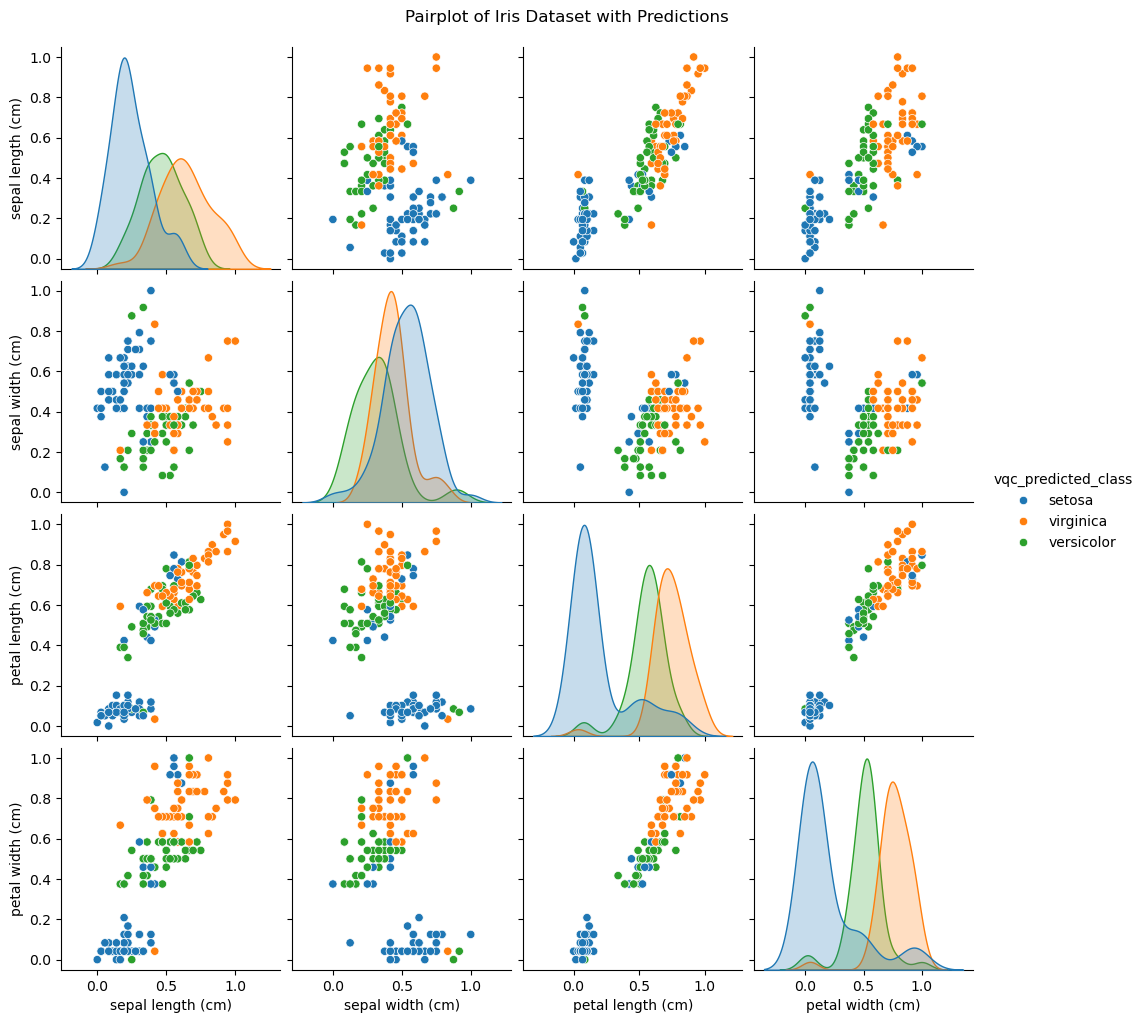

In [56]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

# Load the iris dataset
iris_data = load_iris()
features = iris_data.data
labels = iris_data.target

features = MinMaxScaler().fit_transform(features)


df = pd.DataFrame(features, columns=iris_data.feature_names)
df['class'] = [iris_data.target_names[label] for label in labels]


vqc_predicted_labels = vqc.predict(features)
df['vqc_predicted_class'] = [iris_data.target_names[label] for label in vqc_predicted_labels]

# Create the pairs plot
plot = sns.pairplot(df, hue='vqc_predicted_class', palette='tab10', vars=iris_data.feature_names)
plot.fig.suptitle("Pairplot of Iris Dataset with Predictions", y=1.02)


Text(0.5, 1.02, 'Pairplot of Iris Dataset with Predictions')

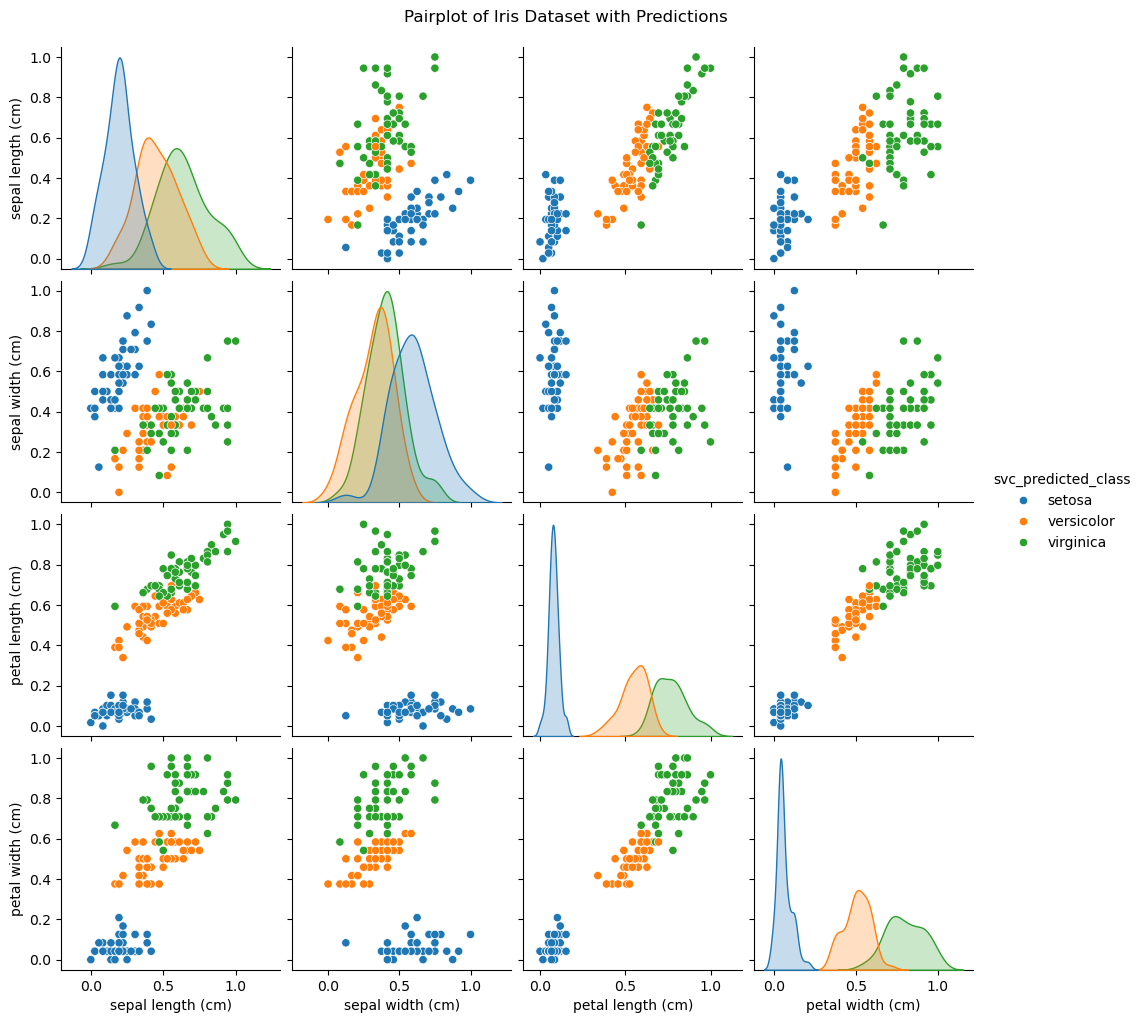

In [57]:
svc_predicted_labels = svc.predict(features)
df['svc_predicted_class'] = [iris_data.target_names[label] for label in svc_predicted_labels]

# Create the pairs plot
plot = sns.pairplot(df, hue='svc_predicted_class', palette='tab10', vars=iris_data.feature_names)
plot.fig.suptitle("Pairplot of Iris Dataset with Predictions", y=1.02)

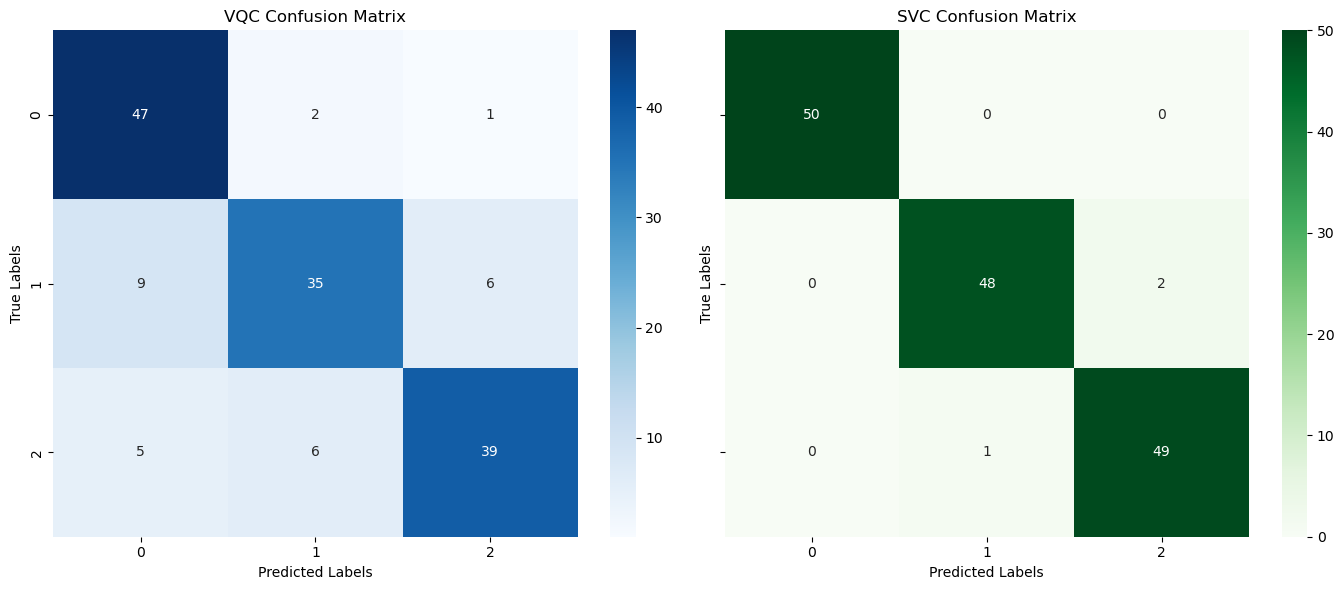

VQC Classification Report
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        50
           1       0.81      0.70      0.75        50
           2       0.85      0.78      0.81        50

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.80       150
weighted avg       0.81      0.81      0.80       150

SVC Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [58]:
vqc_confusion = confusion_matrix(labels, vqc_predicted_labels)
svc_confusion = confusion_matrix(labels, svc_predicted_labels)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot VQC confusion matrix
sns.heatmap(vqc_confusion, annot=True, fmt='d', ax=axes[0], cmap='Blues')
axes[0].set_title('VQC Confusion Matrix')
axes[0].set_xlabel('Predicted Labels')
axes[0].set_ylabel('True Labels')

# Plot SVC confusion matrix
sns.heatmap(svc_confusion, annot=True, fmt='d', ax=axes[1], cmap='Greens')
axes[1].set_title('SVC Confusion Matrix')
axes[1].set_xlabel('Predicted Labels')
axes[1].set_ylabel('True Labels')

plt.tight_layout()
plt.show()

# Print classification reports
print('VQC Classification Report')
print(classification_report(labels, vqc_predicted_labels))

print('SVC Classification Report')
print(classification_report(labels, svc_predicted_labels))


In [65]:
iris_data = load_iris()
features = iris_data.data
labels = iris_data.target

# Normalize the features
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features_scaled, labels, test_size=0.2, random_state=42)

# Train a Support Vector Classifier (SVC)
svc = SVC(probability=True)
svc.fit(X_train, y_train)
svc_predictions = svc.predict(X_test)


vqc_predictions = vqc.predict(X_test)
qsvc_predictions = qsvc.predict(X_test)

# Create a DataFrame for seaborn
df_test = pd.DataFrame(X_test, columns=iris_data.feature_names)
df_test['True Label'] = y_test
df_test['SVC Prediction'] = svc_predictions
df_test['VQC Prediction'] = vqc_predictions
df_test['QSVC Prediction'] = qsvc_predictions
df_test['Correct'] = df_test['SVC Prediction'] == df_test['VQC Prediction']

# Create the pairs plot
pairplot_fig = sns.pairplot(df_test, vars=iris_data.feature_names, hue="True Label", palette='tab10')

# Highlight points where SVC and VQC disagree
for i, (row_index, row) in enumerate(df_test.iterrows()):
    if not row['Correct']:
        
        for j in range(len(iris_data.feature_names)):
            if j == i:
                continue
            row_variable = iris_data.feature_names[j]
            col_variable = iris_data.feature_names[i % len(iris_data.feature_names)]
            axes = pairplot_fig.axes[j, i % len(iris_data.feature_names)]
            axes.scatter(row[col_variable], row[row_variable], facecolors='none', edgecolors='red', s=100)

plt.show()


NameError: name 'qsvc' is not defined

In [60]:
vqc.score(X_test,y_test)

0.8333333333333334

In [61]:
svc.score(X_test,y_test)

1.0

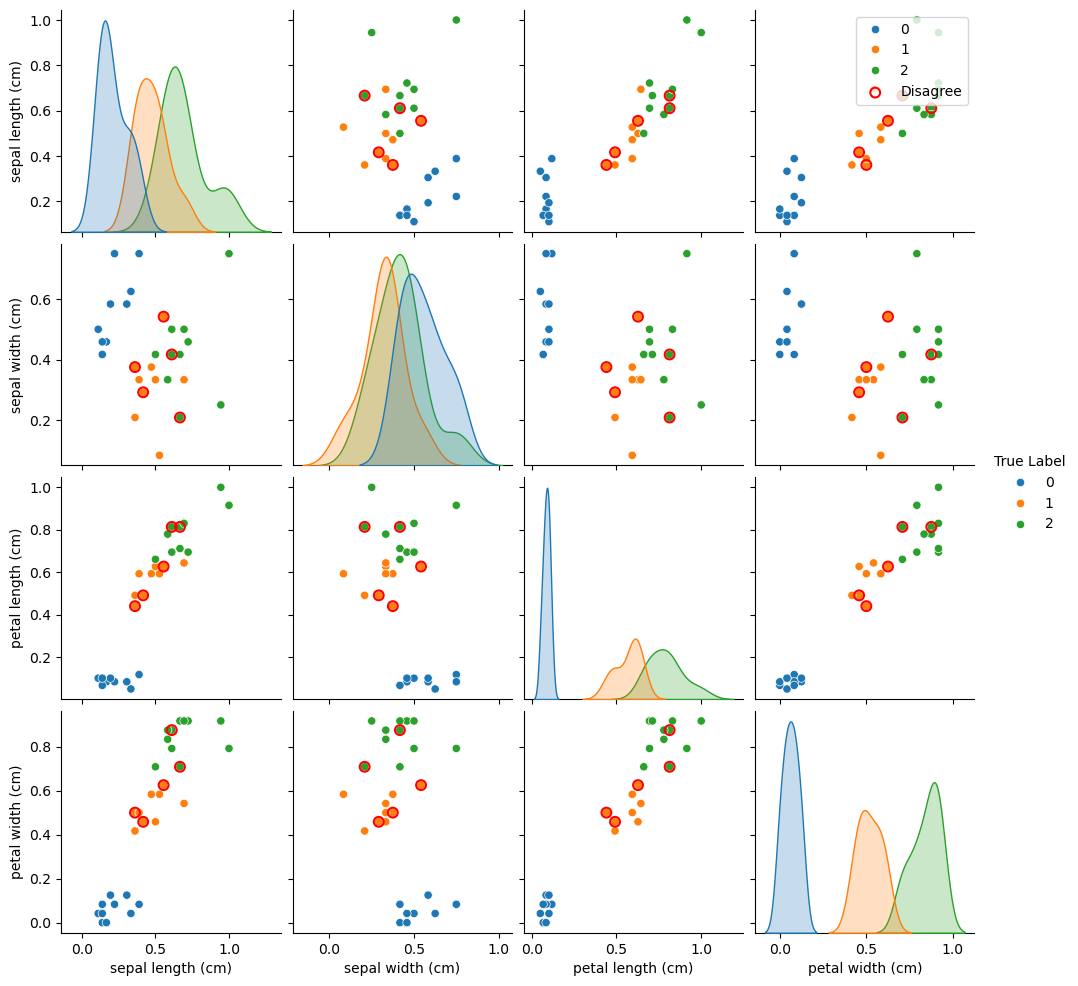

In [62]:

df_test = pd.DataFrame(X_test, columns=iris_data.feature_names)
df_test['True Label'] = y_test
df_test['SVC Prediction'] = svc_predictions
df_test['VQC Prediction'] = vqc_predictions
df_test['Disagree'] = df_test['SVC Prediction'] != df_test['VQC Prediction']

#
pairplot_fig = sns.pairplot(df_test, vars=iris_data.feature_names, hue="True Label", palette='tab10')

# Iterate over the features and plot red circles on the off-diagonal plots where SVC and VQC disagree
for i, feature_i in enumerate(iris_data.feature_names):
    for j, feature_j in enumerate(iris_data.feature_names):
        if i != j:  # Only modify off-diagonal plots
            # Select axes and plot red circles where models' predictions disagree
            axes = pairplot_fig.axes[i, j]
            disagree_subset = df_test[df_test['Disagree']]
            axes.scatter(disagree_subset[feature_j], disagree_subset[feature_i], 
                         facecolors='none', edgecolors='red', s=50, linewidths=1.5, label='Disagree')

# Add legend to the top-right plot
pairplot_fig.axes[0, -1].legend(loc='upper right')

plt.show()

In [64]:
df_test[df_test['Disagree'] == True]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),True Label,SVC Prediction,VQC Prediction,Disagree
6,0.361111,0.375000,0.440678,0.500000,1,1,0,True
9,0.416667,0.291667,0.491525,0.458333,1,1,0,True
15,0.555556,0.541667,0.627119,0.625000,1,1,2,True
16,0.611111,0.416667,0.813559,0.875000,2,2,0,True
26,0.666667,0.208333,0.813559,0.708333,2,2,1,True
